# Insurance Claims- Fraud Detection

## Problem Statement:
Business case:
Insurance fraud is a huge problem in the industry. It's difficult to identify fraud claims. Machine Learning is in a unique position to help the Auto Insurance industry with this problem.

In this project, you are provided a dataset which has the details of the insurance policy along with the customer details. It also has the details of the accident on the basis of which the claims have been made. 

In this example, you will be working with some auto insurance data to demonstrate how you can create a predictive model that predicts if an insurance claim is fraudulent or not. 

In [1]:
import pandas as pd 
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt


from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score


import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r'C:\Users\tusha\Downloads\Automobile_insurance_fraud.csv')
df

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,?,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,38,941851,16-07-1991,OH,500/1000,1000,1310.80,0,431289,...,?,87200,17440,8720,61040,Honda,Accord,2006,N,NaN
996,285,41,186934,05-01-2014,IL,100/300,1000,1436.79,0,608177,...,?,108480,18080,18080,72320,Volkswagen,Passat,2015,N,NaN
997,130,34,918516,17-02-2003,OH,250/500,500,1383.49,3000000,442797,...,YES,67500,7500,7500,52500,Suburu,Impreza,1996,N,NaN
998,458,62,533940,18-11-2011,IL,500/1000,2000,1356.92,5000000,441714,...,YES,46980,5220,5220,36540,Audi,A5,1998,N,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [4]:
# checking the shape of the dataset
df.shape

(1000, 40)

In [5]:
# there are 1000 rows and 40 columns

In [6]:
# checking the names of the columns
df.columns

Index(['months_as_customer', 'age', 'policy_number', 'policy_bind_date',
       'policy_state', 'policy_csl', 'policy_deductable',
       'policy_annual_premium', 'umbrella_limit', 'insured_zip', 'insured_sex',
       'insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'capital-gains', 'capital-loss',
       'incident_date', 'incident_type', 'collision_type', 'incident_severity',
       'authorities_contacted', 'incident_state', 'incident_city',
       'incident_location', 'incident_hour_of_the_day',
       'number_of_vehicles_involved', 'property_damage', 'bodily_injuries',
       'witnesses', 'police_report_available', 'total_claim_amount',
       'injury_claim', 'property_claim', 'vehicle_claim', 'auto_make',
       'auto_model', 'auto_year', 'fraud_reported', '_c39'],
      dtype='object')

In [7]:
# checking the datatypes of the columns
df.dtypes

months_as_customer               int64
age                              int64
policy_number                    int64
policy_bind_date                object
policy_state                    object
policy_csl                      object
policy_deductable                int64
policy_annual_premium          float64
umbrella_limit                   int64
insured_zip                      int64
insured_sex                     object
insured_education_level         object
insured_occupation              object
insured_hobbies                 object
insured_relationship            object
capital-gains                    int64
capital-loss                     int64
incident_date                   object
incident_type                   object
collision_type                  object
incident_severity               object
authorities_contacted           object
incident_state                  object
incident_city                   object
incident_location               object
incident_hour_of_the_day 

In [8]:
# int, object, float all three types of datatypes are present.

### cheking the null values

In [9]:
df.isnull().sum()

months_as_customer                0
age                               0
policy_number                     0
policy_bind_date                  0
policy_state                      0
policy_csl                        0
policy_deductable                 0
policy_annual_premium             0
umbrella_limit                    0
insured_zip                       0
insured_sex                       0
insured_education_level           0
insured_occupation                0
insured_hobbies                   0
insured_relationship              0
capital-gains                     0
capital-loss                      0
incident_date                     0
incident_type                     0
collision_type                    0
incident_severity                 0
authorities_contacted             0
incident_state                    0
incident_city                     0
incident_location                 0
incident_hour_of_the_day          0
number_of_vehicles_involved       0
property_damage             

<AxesSubplot:title={'center':'Heatmap Null Values'}>

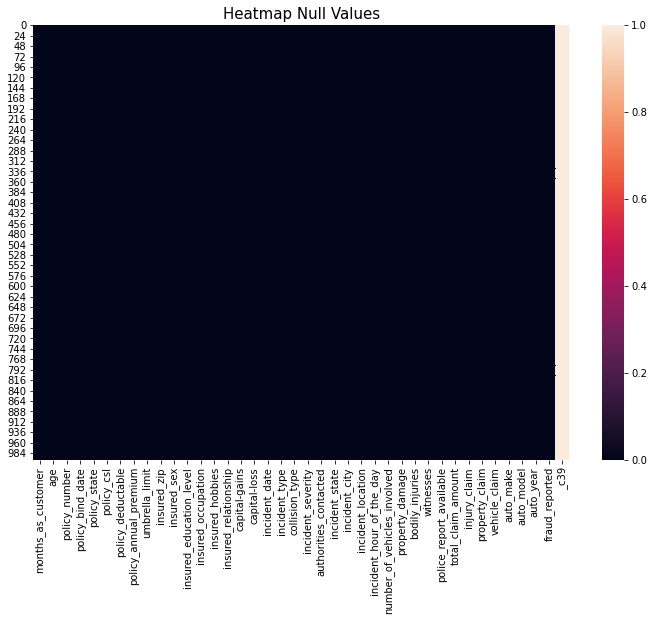

In [10]:
# checking the missing values using the heatmap
plt.figure(figsize=(12,8))
plt.title('Heatmap Null Values', fontsize=15)
sns.heatmap(df.isnull())

In [11]:
# it can be seen that only one column i.e. _c39 has missing values.

In [12]:
df.duplicated().sum()

0

In [13]:
# There are no duplicate values present in the dataset.

In [14]:
# checking the count for each type of value
df.nunique()

months_as_customer              391
age                              46
policy_number                  1000
policy_bind_date                951
policy_state                      3
policy_csl                        3
policy_deductable                 3
policy_annual_premium           991
umbrella_limit                   11
insured_zip                     995
insured_sex                       2
insured_education_level           7
insured_occupation               14
insured_hobbies                  20
insured_relationship              6
capital-gains                   338
capital-loss                    354
incident_date                    60
incident_type                     4
collision_type                    4
incident_severity                 4
authorities_contacted             5
incident_state                    7
incident_city                     7
incident_location              1000
incident_hour_of_the_day         24
number_of_vehicles_involved       4
property_damage             

In [15]:
#lets drop unwanted columns
df.drop(columns = ['policy_number','policy_bind_date','_c39'], inplace = True)

In [16]:
#lets drop unwanted columns
df.drop(columns = ["policy_csl","auto_year","incident_date","insured_zip",], inplace = True)

In [17]:
df.describe()
# This will not include the categorical variables.

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim
count,1000.000000,1000.000000,1000.000000,1000.000000,1.000000e+03,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,203.954000,38.948000,1136.000000,1256.406150,1.101000e+06,25126.100000,-26793.700000,11.644000,1.83900,0.992000,1.487000,52761.94000,7433.420000,7399.570000,37928.950000
std,115.113174,9.140287,611.864673,244.167395,2.297407e+06,27872.187708,28104.096686,6.951373,1.01888,0.820127,1.111335,26401.53319,4880.951853,4824.726179,18886.252893
min,0.000000,19.000000,500.000000,433.330000,-1.000000e+06,0.000000,-111100.000000,0.000000,1.00000,0.000000,0.000000,100.00000,0.000000,0.000000,70.000000
25%,115.750000,32.000000,500.000000,1089.607500,0.000000e+00,0.000000,-51500.000000,6.000000,1.00000,0.000000,1.000000,41812.50000,4295.000000,4445.000000,30292.500000
50%,199.500000,38.000000,1000.000000,1257.200000,0.000000e+00,0.000000,-23250.000000,12.000000,1.00000,1.000000,1.000000,58055.00000,6775.000000,6750.000000,42100.000000
75%,276.250000,44.000000,2000.000000,1415.695000,0.000000e+00,51025.000000,0.000000,17.000000,3.00000,2.000000,2.000000,70592.50000,11305.000000,10885.000000,50822.500000
max,479.000000,64.000000,2000.000000,2047.590000,1.000000e+07,100500.000000,0.000000,23.000000,4.00000,2.000000,3.000000,114920.00000,21450.000000,23670.000000,79560.000000


In [18]:
df.describe(include='all')
# by using all it can be assured that categorical feature are also included.

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
count,1000.000000,1000.000000,1000,1000.000000,1000.000000,1.000000e+03,1000,1000,1000,1000,...,1000.000000,1000.000000,1000,1000.00000,1000.000000,1000.000000,1000.000000,1000,1000,1000
unique,NaN,NaN,3,NaN,NaN,NaN,2,7,14,20,...,NaN,NaN,3,NaN,NaN,NaN,NaN,14,39,2
top,NaN,NaN,OH,NaN,NaN,NaN,FEMALE,JD,machine-op-inspct,reading,...,NaN,NaN,NO,NaN,NaN,NaN,NaN,Saab,RAM,N
freq,NaN,NaN,352,NaN,NaN,NaN,537,161,93,64,...,NaN,NaN,343,NaN,NaN,NaN,NaN,80,43,753
mean,203.954000,38.948000,NaN,1136.000000,1256.406150,1.101000e+06,NaN,NaN,NaN,NaN,...,0.992000,1.487000,NaN,52761.94000,7433.420000,7399.570000,37928.950000,NaN,NaN,NaN
std,115.113174,9.140287,NaN,611.864673,244.167395,2.297407e+06,NaN,NaN,NaN,NaN,...,0.820127,1.111335,NaN,26401.53319,4880.951853,4824.726179,18886.252893,NaN,NaN,NaN
min,0.000000,19.000000,NaN,500.000000,433.330000,-1.000000e+06,NaN,NaN,NaN,NaN,...,0.000000,0.000000,NaN,100.00000,0.000000,0.000000,70.000000,NaN,NaN,NaN
25%,115.750000,32.000000,NaN,500.000000,1089.607500,0.000000e+00,NaN,NaN,NaN,NaN,...,0.000000,1.000000,NaN,41812.50000,4295.000000,4445.000000,30292.500000,NaN,NaN,NaN
50%,199.500000,38.000000,NaN,1000.000000,1257.200000,0.000000e+00,NaN,NaN,NaN,NaN,...,1.000000,1.000000,NaN,58055.00000,6775.000000,6750.000000,42100.000000,NaN,NaN,NaN
75%,276.250000,44.000000,NaN,2000.000000,1415.695000,0.000000e+00,NaN,NaN,NaN,NaN,...,2.000000,2.000000,NaN,70592.50000,11305.000000,10885.000000,50822.500000,NaN,NaN,NaN


### Univariate Analysis

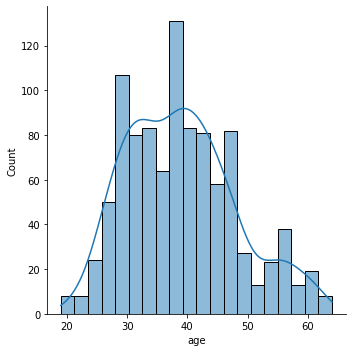

In [19]:
sns.displot(df["age"],bins=20,kde=True)

In [20]:
# The plot can be seen that they are normal distributed

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

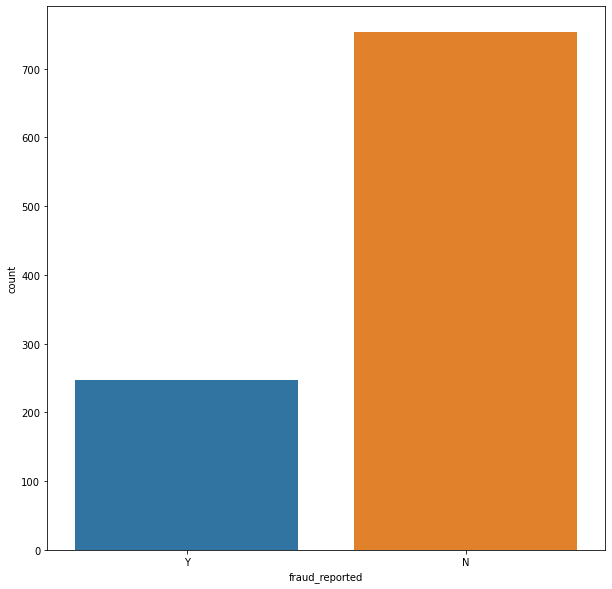

In [21]:
f, ax = plt.subplots(figsize=(10, 10))
sns.countplot(x='fraud_reported',data=df)

In [22]:
# Fraud reported is very less as compared to not reported.

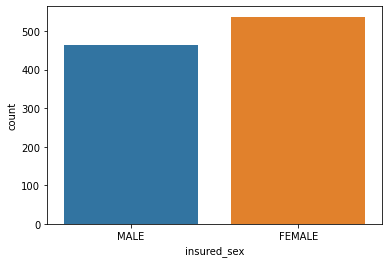

In [23]:
#lets check counts for collision_type
sns.countplot(x = 'insured_sex', data = df)
plt.show()

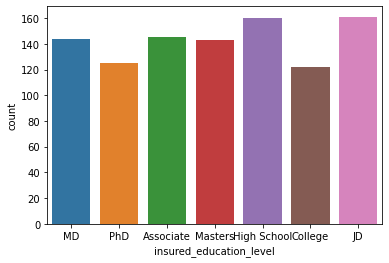

In [24]:
#lets check counts for collision_type
sns.countplot(x = 'insured_education_level', data = df)
plt.show()

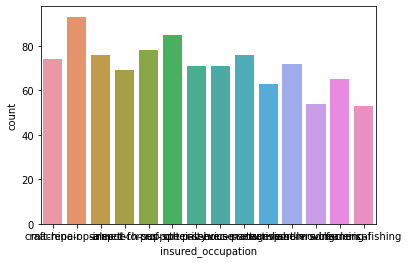

In [25]:
#lets check counts for collision_type
sns.countplot(x = 'insured_occupation', data = df)
plt.show()

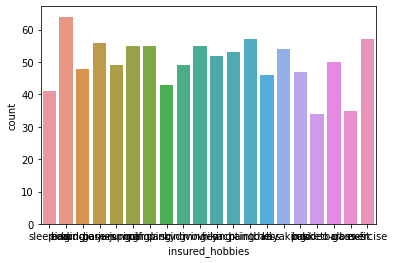

In [26]:
#lets check counts for collision_type
sns.countplot(x = 'insured_hobbies', data = df)
plt.show()

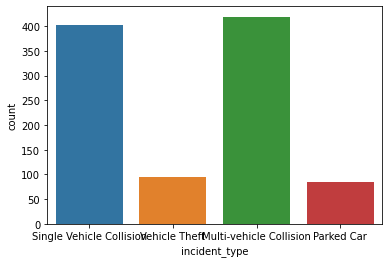

In [27]:
#lets check counts for collision_type
sns.countplot(x = 'incident_type', data = df)
plt.show()

<AxesSubplot:xlabel='policy_state', ylabel='count'>

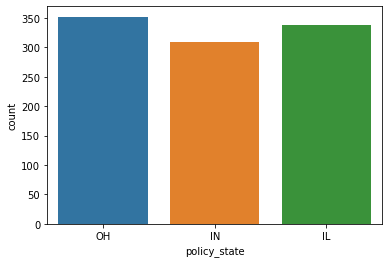

In [28]:
sns.countplot(df['policy_state'])

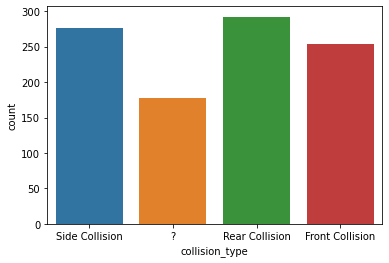

In [29]:
#lets check counts for collision_type
sns.countplot(x = 'collision_type', data = df)
plt.show()

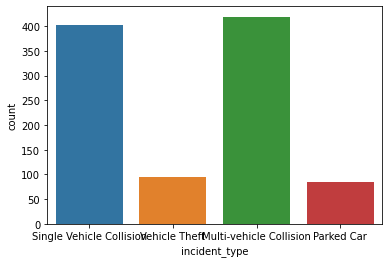

In [30]:
#lets check counts for collision_type
sns.countplot(x = 'incident_type', data = df)
plt.show()

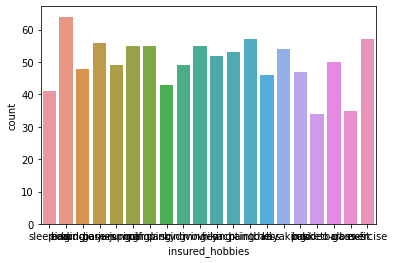

In [31]:
#lets check counts for collision_type
sns.countplot(x = 'insured_hobbies', data = df)
plt.show()

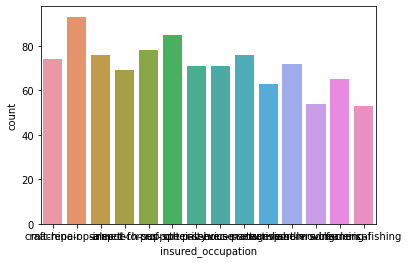

In [32]:
#lets check counts for collision_type
sns.countplot(x = 'insured_occupation', data = df)
plt.show()

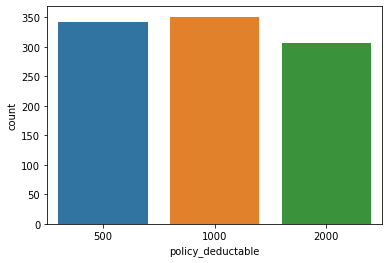

In [33]:
#lets check fraud_report based on policy_state 
sns.countplot(df['policy_deductable'])
plt.show()

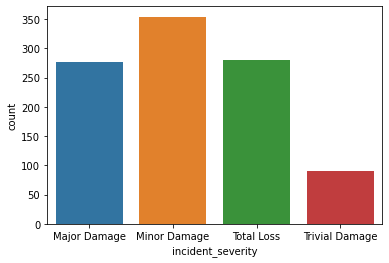

In [34]:
#lets check counts for collision_type
sns.countplot(x = 'incident_severity', data = df)
plt.show()

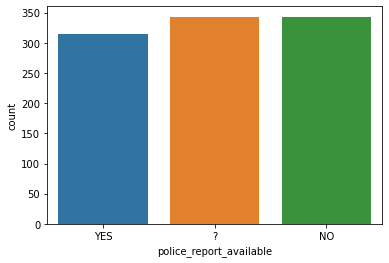

In [35]:
#lets check counts for collision_type
sns.countplot(x = 'police_report_available', data = df)
plt.show()

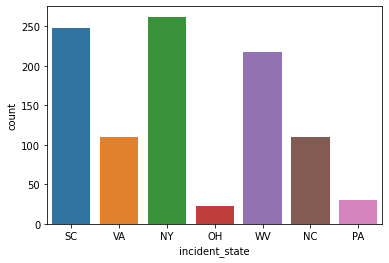

In [36]:
#lets check counts for collision_type
sns.countplot(x = 'incident_state', data = df)
plt.show()

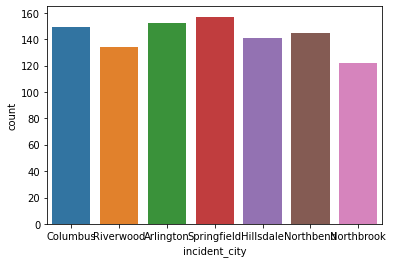

In [37]:
#lets check counts for collision_type
sns.countplot(x = 'incident_city', data = df)
plt.show()

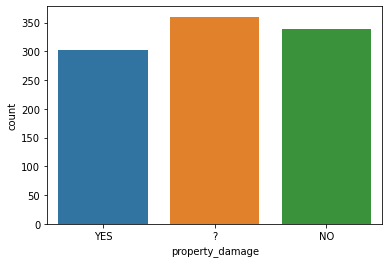

In [38]:
#lets check counts for collision_type
sns.countplot(x = 'property_damage', data = df)
plt.show()

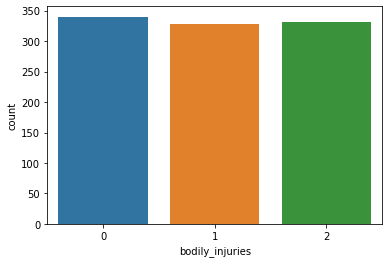

In [39]:
#lets check counts for collision_type
sns.countplot(x = 'bodily_injuries', data = df)
plt.show()

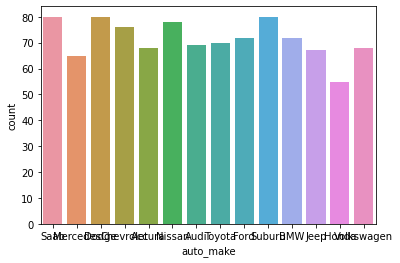

In [40]:
#lets check counts for collision_type
sns.countplot(x = 'auto_make', data = df)
plt.show()

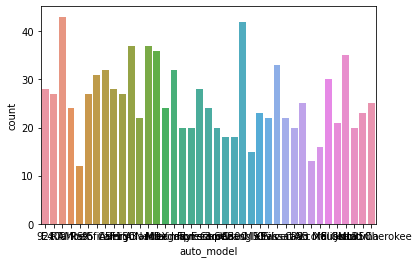

In [41]:
#lets check counts for collision_type
sns.countplot(x = 'auto_model', data = df)
plt.show()

## Bivariate Analysis

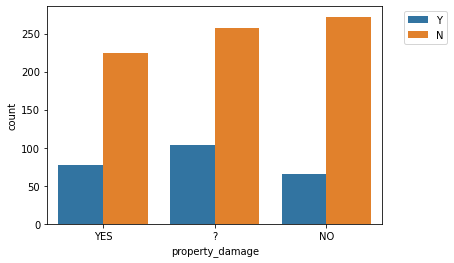

In [42]:
#lets check counts for property_damage
sns.countplot(x = 'property_damage',hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

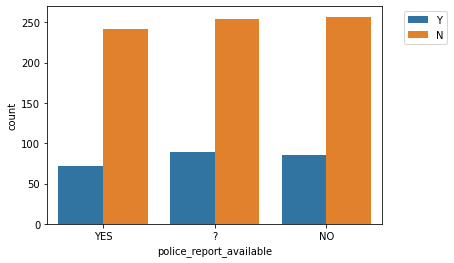

In [43]:
#lets check counts for police_report_available 
sns.countplot(x = 'police_report_available',hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

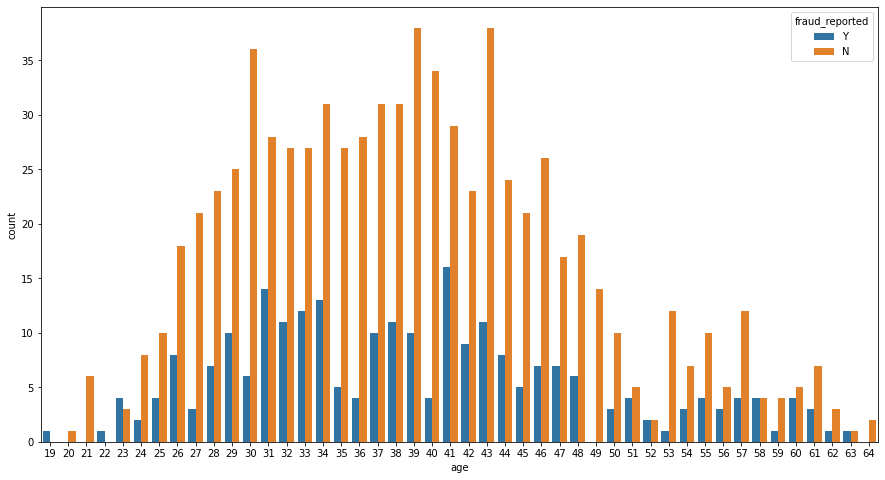

In [44]:
#lets check the fraud_report based on age
plt.figure(figsize = (15,8))
sns.countplot(x = 'age', hue = 'fraud_reported', data = df)
plt.show()

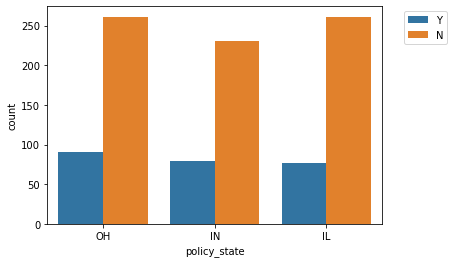

In [45]:
#lets check fraud_report based on policy_state 
sns.countplot(x = 'policy_state', hue = 'fraud_reported', data = df)
plt.legend( bbox_to_anchor = (1.05, 1), loc = 'upper left')
plt.show()

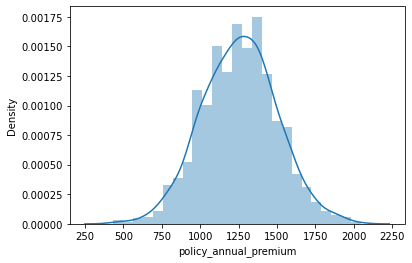

In [46]:
#lets have a look at destribution of policy_annual_premium
sns.distplot(df['policy_annual_premium'])
plt.show()

In [47]:
# Policy_annual_premium is normal distribution.

### Data Processing

In [48]:
#lets replace the categorical data in columns property_damage and police_report_available with suitable number
# I am replacing '?' with most frequent number of that column
df['property_damage'].replace('YES', 1, inplace=True)
df['property_damage'].replace('NO', 0, inplace=True)
df['property_damage'].replace('?', 0, inplace=True)
df['police_report_available'].replace('YES', 1, inplace=True)
df['police_report_available'].replace('NO',0, inplace=True)
df['police_report_available'].replace('?', 0, inplace=True)
df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,2,1,71610,6510,13020,52080,Saab,92x,Y
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,0,0,5070,780,780,3510,Mercedes,E400,Y
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,3,0,34650,7700,3850,23100,Dodge,RAM,N
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,Y
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,0,6500,1300,650,4550,Accura,RSX,N


In [49]:
#lets replace label data with 0 & 1
df['fraud_reported'].replace('Y', 1, inplace = True)
df['fraud_reported'].replace('N', 0, inplace = True)

df.head()

,months_as_customer,age,policy_state,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_hobbies,...,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,fraud_reported
0,328,48,OH,1000,1406.91,0,MALE,MD,craft-repair,sleeping,...,1,2,1,71610,6510,13020,52080,Saab,92x,1
1,228,42,IN,2000,1197.22,5000000,MALE,MD,machine-op-inspct,reading,...,0,0,0,5070,780,780,3510,Mercedes,E400,1
2,134,29,OH,2000,1413.14,5000000,FEMALE,PhD,sales,board-games,...,2,3,0,34650,7700,3850,23100,Dodge,RAM,0
3,256,41,IL,2000,1415.74,6000000,FEMALE,PhD,armed-forces,board-games,...,1,2,0,63400,6340,6340,50720,Chevrolet,Tahoe,1
4,228,44,IL,1000,1583.91,6000000,MALE,Associate,sales,board-games,...,0,1,0,6500,1300,650,4550,Accura,RSX,0


In [50]:
df.corr()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
months_as_customer,1.000000,0.922098,0.026807,0.005018,0.015498,0.006399,0.020209,0.070639,0.014736,0.005488,-0.010162,0.058383,-0.022146,0.062108,0.065329,0.034940,0.061013,0.020544
age,0.922098,1.000000,0.029188,0.014404,0.018126,-0.007075,0.007368,0.087161,0.022102,-0.003408,-0.015679,0.052359,-0.020441,0.069863,0.075522,0.060898,0.062588,0.012143
policy_deductable,0.026807,0.029188,1.000000,-0.003245,0.010870,0.035212,-0.023544,0.060935,0.051214,0.015770,-0.022765,0.066639,0.038036,0.022839,0.039107,0.064792,0.005269,0.014817
policy_annual_premium,0.005018,0.014404,-0.003245,1.000000,-0.006247,-0.013738,0.023547,-0.001578,-0.045991,0.080738,0.026780,0.002332,0.021998,0.009094,-0.017633,-0.011654,0.020246,-0.014480
umbrella_limit,0.015498,0.018126,0.010870,-0.006247,1.000000,-0.047268,-0.024056,-0.023257,-0.021270,-0.076358,0.022743,-0.006738,-0.044771,-0.040344,-0.045412,-0.023790,-0.038584,0.058622
capital-gains,0.006399,-0.007075,0.035212,-0.013738,-0.047268,1.000000,-0.046904,-0.016406,0.061643,-0.000616,0.055829,-0.017651,-0.012939,0.015980,0.025934,-0.000779,0.015836,-0.019173
capital-loss,0.020209,0.007368,-0.023544,0.023547,-0.024056,-0.046904,1.000000,-0.025054,-0.014895,0.016981,-0.024418,-0.041330,-0.039256,-0.036060,-0.046060,-0.022863,-0.032665,-0.014863
incident_hour_of_the_day,0.070639,0.087161,0.060935,-0.001578,-0.023257,-0.016406,-0.025054,1.000000,0.120794,0.064425,-0.034563,0.006527,0.040558,0.217702,0.165768,0.179536,0.215626,0.004316
number_of_vehicles_involved,0.014736,0.022102,0.051214,-0.045991,-0.021270,0.061643,-0.014895,0.120794,1.000000,-0.013641,0.014030,-0.014669,-0.007291,0.274278,0.224650,0.219084,0.269393,0.051839
property_damage,0.005488,-0.003408,0.015770,0.080738,-0.076358,-0.000616,0.016981,0.064425,-0.013641,1.000000,0.003762,-0.019753,-0.022657,0.060597,0.048886,0.045211,0.060526,0.017202


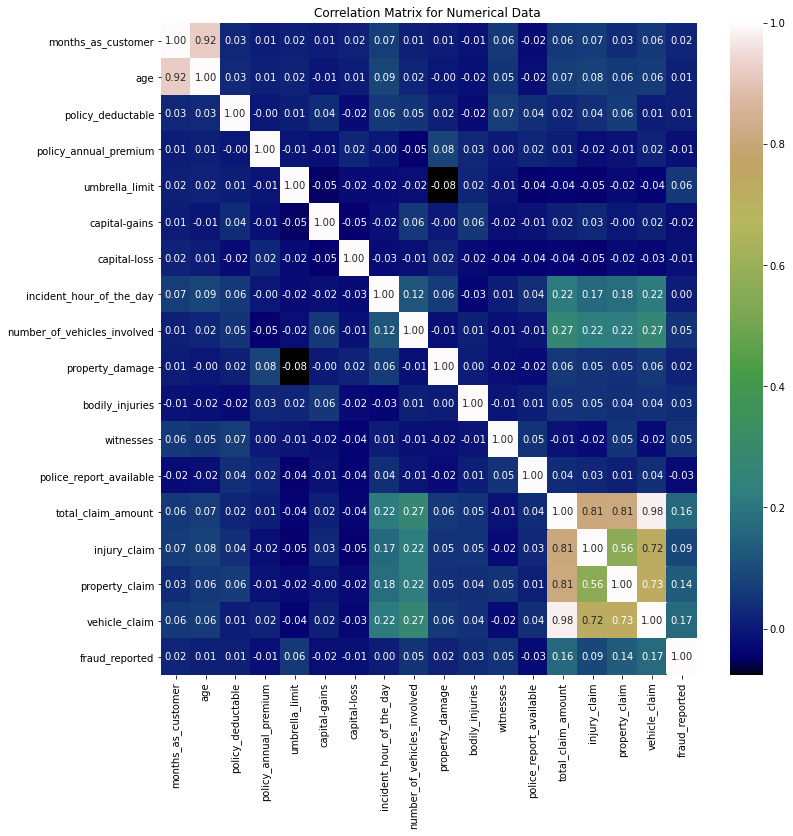

In [51]:
corr = df.corr()
plt.figure(figsize = (12,12))
sns.heatmap(corr, annot = True,cmap = 'gist_earth',fmt = '.2f')
plt.title("Correlation Matrix for Numerical Data ")
plt.show()

### Outliers Detection 

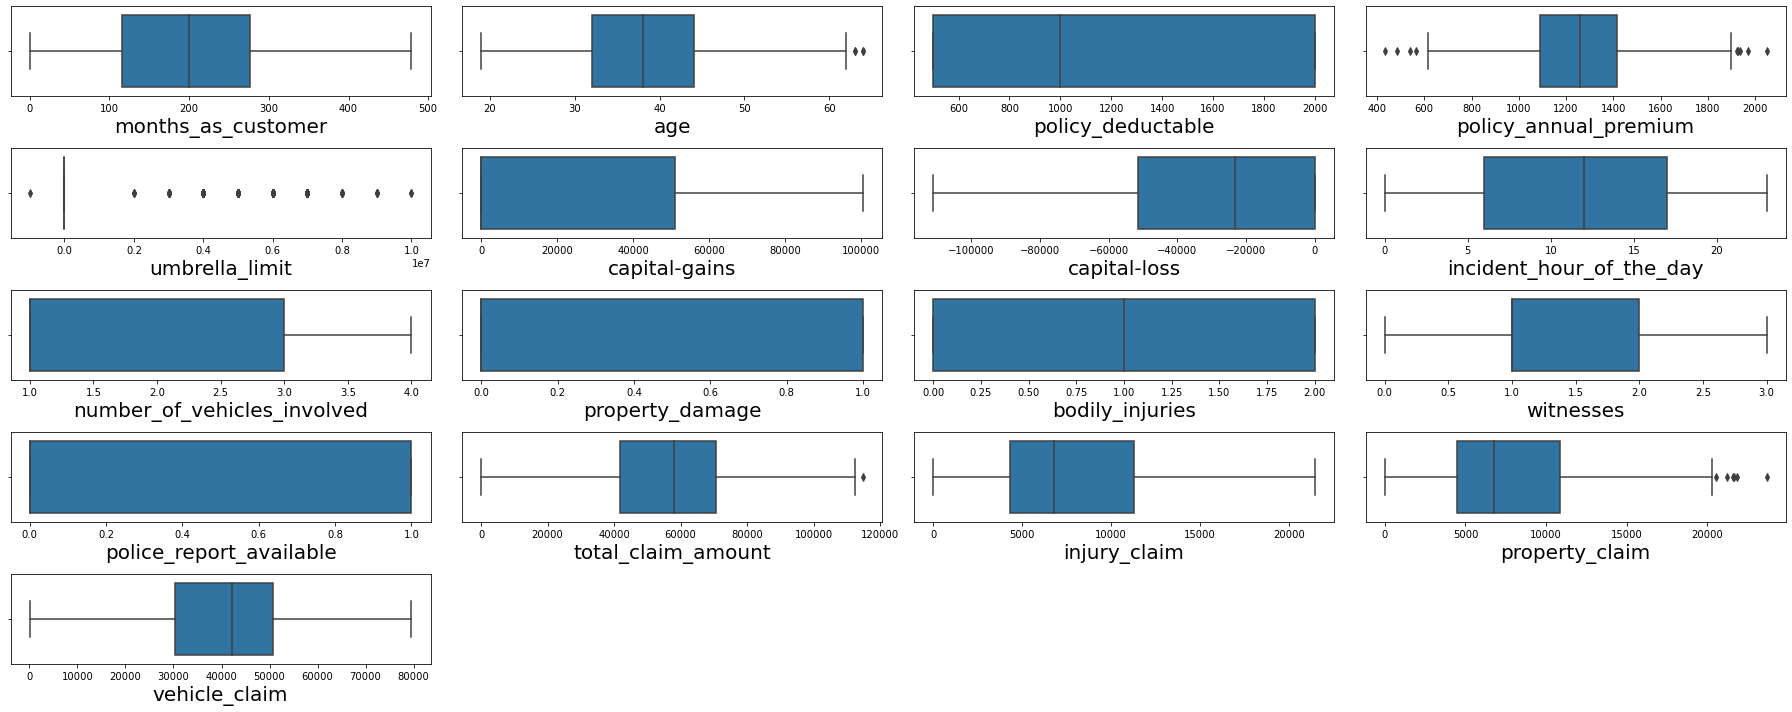

In [52]:
#lets check outliers from continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (25,10))
plotnumber = 1
for column in num_data:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

In [53]:
# from boxplot very less outlier can be seen 

In [54]:
#lets remove outliers using zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["age","policy_annual_premium","umbrella_limit","total_claim_amount","property_claim"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df1 = df[filtering_entry]
df1.reset_index(inplace = True)

In [55]:
df1.shape

(981, 34)

In [56]:
print("shape before removing the outliers",df.shape)
df1=df[(z_score<3).all(axis=1)]
print("shape after removing the outliers",df1.shape)

Dataloss=((1000-981)/1000)*100
Dataloss

shape before removing the outliers (1000, 33)
shape after removing the outliers (983, 33)


1.9

In [57]:
# Data loss is about 2% which is not bad for analysis

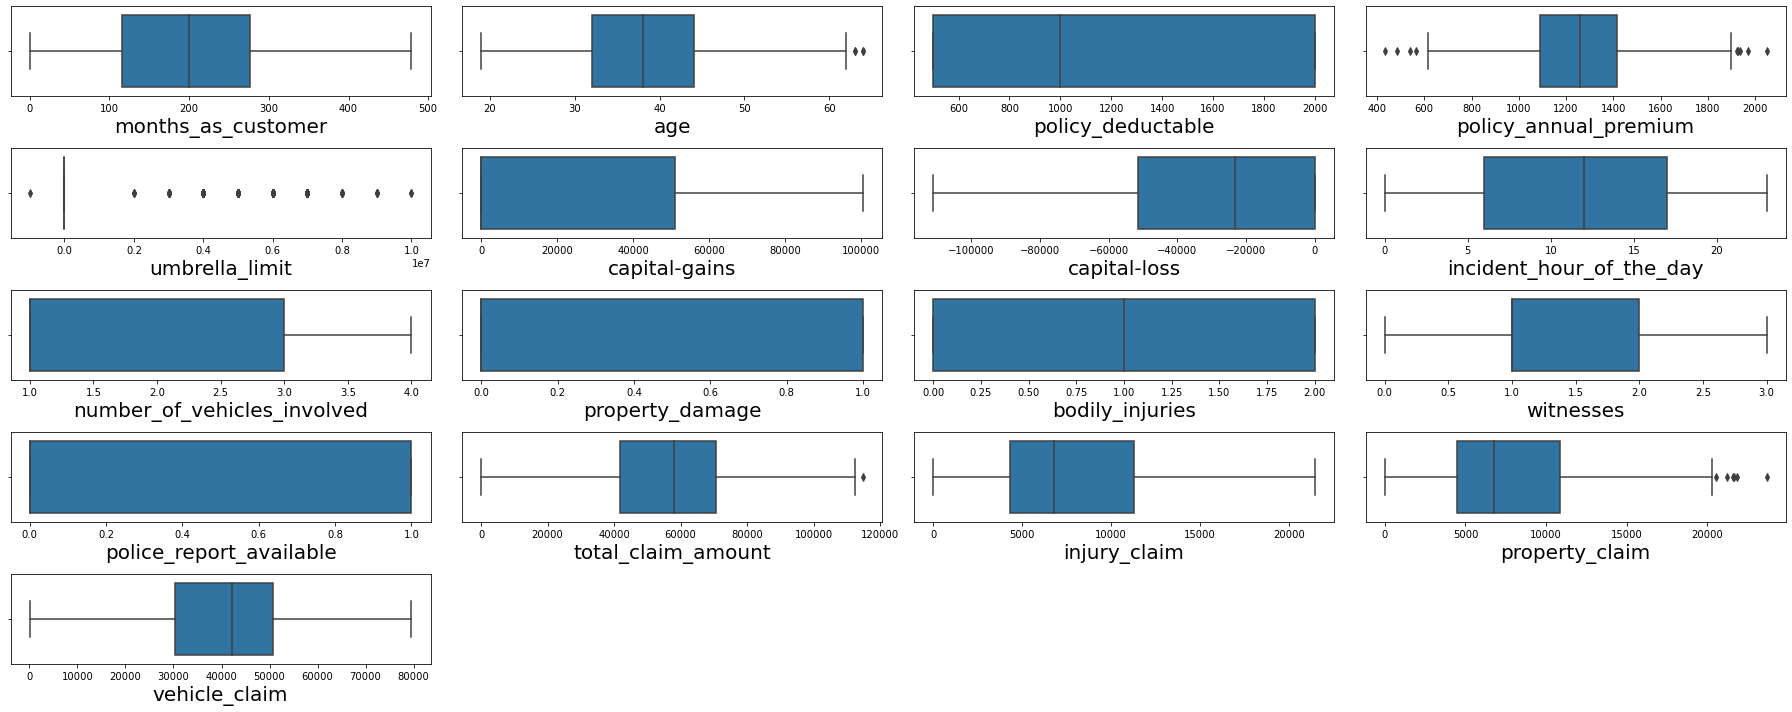

In [58]:
#lets check outliers from continuous columns
num_data = df._get_numeric_data()
plt.figure(figsize = (25,10))
plotnumber = 1
for column in num_data:
    if plotnumber <=17:
        ax = plt.subplot(5,4,plotnumber)
        sns.boxplot(num_data[column])
        plt.xlabel(column,fontsize = 20)
    plotnumber+=1
plt.tight_layout()

### Skewness

In [59]:
#first check the skewness
df.skew()

months_as_customer             0.362177
age                            0.478988
policy_deductable              0.477887
policy_annual_premium          0.004402
umbrella_limit                 1.806712
capital-gains                  0.478850
capital-loss                  -0.391472
incident_hour_of_the_day      -0.035584
number_of_vehicles_involved    0.502664
property_damage                0.863806
bodily_injuries                0.014777
witnesses                      0.019636
police_report_available        0.802728
total_claim_amount            -0.594582
injury_claim                   0.264811
property_claim                 0.378169
vehicle_claim                 -0.621098
fraud_reported                 1.175051
dtype: float64

### Removing Outliers

In [60]:
#lets remove outliers using zscore method
from scipy import stats
from scipy.stats import zscore
z_score = zscore(df[["age","policy_annual_premium","umbrella_limit","total_claim_amount","property_claim"]])
abs_z_score = np.abs(z_score)
filtering_entry = (abs_z_score < 3).all(axis = 1)
df = df[filtering_entry]
df.reset_index(inplace = True)

In [61]:
df.shape

(981, 34)

By removing outliers we are loosing about 2% of data, which is acceptable.

In [62]:
#lets drop index column
df.drop(columns = 'index', inplace = True)

In [63]:
#lets check the skewness after removing outliers
df.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.803065
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.506989
property_damage                0.854687
bodily_injuries                0.001877
witnesses                      0.024567
police_report_available        0.797825
total_claim_amount            -0.595242
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -0.622528
fraud_reported                 1.189838
dtype: float64

## Separate features and label as x and y respectively

In [64]:
# lets saperate label and features
x = df.drop(columns = 'fraud_reported')
y = df['fraud_reported']

In [65]:
#lets separate numerical and categorical features for scaling and encoding
num = x._get_numeric_data()
cat = x.select_dtypes(include=['object'])

In [66]:
#Lets treat the skewness from numerical columns
for index in num.skew().index:
    if num.skew().loc[index]>0.5:
        num[index]=np.cbrt(num[index])
    if num.skew().loc[index]<-0.5:
        num[index]=np.log1p(num[index])

In [67]:
num.skew()

months_as_customer             0.363268
age                            0.475942
policy_deductable              0.473431
policy_annual_premium          0.034884
umbrella_limit                 1.605531
capital-gains                  0.465985
capital-loss                  -0.390468
incident_hour_of_the_day      -0.038146
number_of_vehicles_involved    0.428659
property_damage                0.854687
bodily_injuries                0.001877
witnesses                      0.024567
police_report_available        0.797825
total_claim_amount            -1.667747
injury_claim                   0.269442
property_claim                 0.358919
vehicle_claim                 -1.676973
dtype: float64

### Applying StandardScaler

In [68]:
#Lets bring all numerical features to common scale by applying standard scaler
scaler = StandardScaler()
x_num = scaler.fit_transform(num)
x_num = pd.DataFrame(x_num,columns=num.columns)

In [69]:
#combine both numerical and categorical features
X = pd.concat([num,cat], axis = 1)

### Encoding

In [70]:
#lets convert categorical data into numeric values, using OrdinalEncoder
from sklearn.preprocessing import OrdinalEncoder
enc = OrdinalEncoder()
for i in X.columns:
    if X[i].dtypes == "object" :
        X[i] = enc.fit_transform(X[i].values.reshape(-1,1))

In [71]:
#lets have a look at data after encoding
X.head()

,months_as_customer,age,policy_deductable,policy_annual_premium,umbrella_limit,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,...,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,incident_state,incident_city,incident_location,auto_make,auto_model
0,328,48,1000,1406.91,0.000000,53300,0,5,1.00000,1.0,...,0.0,2.0,3.0,0.0,4.0,4.0,1.0,977.0,10.0,1.0
1,228,42,2000,1197.22,170.997595,0,0,8,1.00000,0.0,...,2.0,3.0,0.0,1.0,4.0,5.0,5.0,616.0,8.0,12.0
2,134,29,2000,1413.14,170.997595,35100,0,7,1.44225,0.0,...,3.0,0.0,2.0,1.0,4.0,1.0,1.0,671.0,4.0,30.0
3,256,41,2000,1415.74,181.712059,48900,-62400,5,1.00000,0.0,...,4.0,2.0,1.0,0.0,4.0,2.0,0.0,656.0,3.0,34.0
4,228,44,1000,1583.91,181.712059,66000,-46000,20,1.00000,0.0,...,4.0,3.0,0.0,1.0,2.0,1.0,0.0,214.0,0.0,31.0


In [72]:
#check value count for target variable
y.value_counts()

0    741
1    240
Name: fraud_reported, dtype: int64

We can see that this is a case of imbalance, so will do oversampling

## Over sampling

In [73]:
#lets do oversampling using SMOTE
import imblearn
from imblearn.over_sampling import SMOTE
SM = SMOTE()
x_over,y_over = SM.fit_resample(X,y)

In [74]:
#lets check the target variable now
y_over.value_counts()

0    741
1    741
Name: fraud_reported, dtype: int64

## Finding Best random state

In [75]:
# Importing libraries
from sklearn.model_selection import train_test_split, GridSearchCV

#import required accuracy metrics
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import KFold, cross_val_score


In [76]:
#Lets find the best random state using LogisticRegression
from sklearn.linear_model import LogisticRegression
max_accu = 0
max_rs = 0
for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x_over,y_over,test_size = 0.25, random_state = i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    pred = LR.predict(x_test)
    acc = accuracy_score(y_test,pred)
    if acc > max_accu:
        max_accu = acc
        max_rs = i
print("Best accuracy is",max_accu,"on Random State",max_rs)

Best accuracy is 0.5956873315363881 on Random State 97


In [77]:
#lets split our data into train and test parts with best random_state
x_train,x_test,y_train,y_test = train_test_split(x_over, y_over, test_size = 0.25, random_state = 144 )

## Model Building with Evaluation Metrics

### LogisticRegression model

In [78]:
#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 53.09973045822103
roc_auc_score: 53.57456140350877
---------------------------------------------------
Confusion Matrix : 
 [[ 95 105]
 [ 69 102]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.58      0.47      0.52       200
           1       0.49      0.60      0.54       171

    accuracy                           0.53       371
   macro avg       0.54      0.54      0.53       371
weighted avg       0.54      0.53      0.53       371


Cross validation score : 54.18011971703247

Accuracy Score - Cross Validation Score : -1.0803892588114365


In [79]:
### LogisticRegression model

#Lets check the model with LogisticRegression
LR.fit(x_train,y_train)
predlr = LR.predict(x_test)
accuracy = accuracy_score(y_test,predlr)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,predlr)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,predlr)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,predlr)}")

#cross validation score
scores = cross_val_score(LR, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 53.09973045822103
roc_auc_score: 53.57456140350877
---------------------------------------------------
Confusion Matrix : 
 [[ 95 105]
 [ 69 102]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.58      0.47      0.52       200
           1       0.49      0.60      0.54       171

    accuracy                           0.53       371
   macro avg       0.54      0.54      0.53       371
weighted avg       0.54      0.53      0.53       371


Cross validation score : 54.18011971703247

Accuracy Score - Cross Validation Score : -1.0803892588114365


### DecesionTreeClassifier model

In [80]:
#model with DecesionTreeClassifier
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)
pred_dt = dt.predict(x_test)
accuracy = accuracy_score(y_test,pred_dt)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_dt)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_dt)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_dt)}")

#cross validation score
scores = cross_val_score(dt, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 83.01886792452831
roc_auc_score: 83.02046783625731
---------------------------------------------------
Confusion Matrix : 
 [[166  34]
 [ 29 142]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       200
           1       0.81      0.83      0.82       171

    accuracy                           0.83       371
   macro avg       0.83      0.83      0.83       371
weighted avg       0.83      0.83      0.83       371


Cross validation score : 83.8205151460185


Accuracy Score - Cross Validation Score : -0.8016472214901853


### RandomForestClassifier model

In [81]:
#model with RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
pred_rf = rf.predict(x_test)
accuracy = accuracy_score(y_test,pred_rf)*100

print(f"Accuracy Score:", accuracy)
print(f"\nroc_auc_score: {roc_auc_score(y_test,pred_rf)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_rf)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_rf)}")

#cross validation score
scores = cross_val_score(rf, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 89.4878706199461

roc_auc_score: 89.14766081871346
---------------------------------------------------
Confusion Matrix : 
 [[187  13]
 [ 26 145]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91       200
           1       0.92      0.85      0.88       171

    accuracy                           0.89       371
   macro avg       0.90      0.89      0.89       371
weighted avg       0.90      0.89      0.89       371


Cross validation score : 86.38853618719389


Accuracy Score - Cross Validation Score : 3.099334432752201


### KNeighborsClassifier model

In [82]:
#model with KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
kn = KNeighborsClassifier()
kn.fit(x_train,y_train)
pred_kn = kn.predict(x_test)
accuracy = accuracy_score(y_test,pred_kn)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_kn)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_kn)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_kn)}")

#cross validation score
scores = cross_val_score(kn, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\n\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 69.2722371967655
roc_auc_score: 69.93128654970761
---------------------------------------------------
Confusion Matrix : 
 [[123  77]
 [ 37 134]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.77      0.61      0.68       200
           1       0.64      0.78      0.70       171

    accuracy                           0.69       371
   macro avg       0.70      0.70      0.69       371
weighted avg       0.71      0.69      0.69       371


Cross validation score : 70.44395066207147


Accuracy Score - Cross Validation Score : -1.1717134653059702


### XGBClassifier model

In [83]:
#lets check with XGBClassifier model
from xgboost import XGBClassifier
xgb = XGBClassifier(verbosity = 0)
xgb.fit(x_train,y_train)
pred_xgb = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_xgb)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_xgb)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_xgb)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_xgb)}")

#cross validation score
scores = cross_val_score(xgb, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 88.67924528301887
roc_auc_score: 88.31286549707602
---------------------------------------------------
Confusion Matrix : 
 [[186  14]
 [ 28 143]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       200
           1       0.91      0.84      0.87       171

    accuracy                           0.89       371
   macro avg       0.89      0.88      0.89       371
weighted avg       0.89      0.89      0.89       371


Cross validation score : 87.80155994921095

Accuracy Score - Cross Validation Score : 0.8776853338079178


## ExtraTreesClassifier model

In [84]:
#lets check with Extra Trees Classifier
from sklearn.ensemble import ExtraTreesClassifier
ext = ExtraTreesClassifier()
ext.fit(x_train,y_train)
pred_ext = xgb.predict(x_test)
accuracy = accuracy_score(y_test,pred_ext)*100

print(f"Accuracy Score:", accuracy)
print(f"roc_auc_score: {roc_auc_score(y_test,pred_ext)*100}")
print("---------------------------------------------------")

#confusion matrix & classification report
print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred_ext)}\n")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred_ext)}")

#cross validation score
scores = cross_val_score(ext, x_over, y_over, cv = 10,scoring = "accuracy" ).mean()*100
print("\nCross validation score :", scores)

#result of accuracy minus cv score
result = accuracy - scores
print("\nAccuracy Score - Cross Validation Score :", result)

Accuracy Score: 88.67924528301887
roc_auc_score: 88.31286549707602
---------------------------------------------------
Confusion Matrix : 
 [[186  14]
 [ 28 143]]

CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.87      0.93      0.90       200
           1       0.91      0.84      0.87       171

    accuracy                           0.89       371
   macro avg       0.89      0.88      0.89       371
weighted avg       0.89      0.89      0.89       371


Cross validation score : 90.09341556321422

Accuracy Score - Cross Validation Score : -1.41417028019535


## AUC ROC Curve

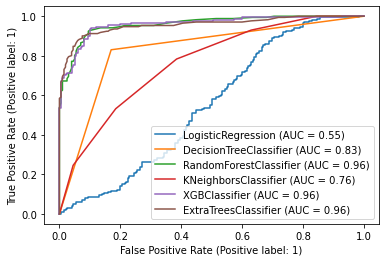

In [85]:
#Lets plot roc curve and check auc and performance of all algorithms
from sklearn.metrics import plot_roc_curve
disp = plot_roc_curve(LR, x_test, y_test)
plot_roc_curve(dt, x_test, y_test, ax = disp.ax_)
plot_roc_curve(rf, x_test, y_test, ax = disp.ax_)
plot_roc_curve(kn, x_test, y_test, ax = disp.ax_)
plot_roc_curve(xgb, x_test, y_test, ax = disp.ax_)
plot_roc_curve(ext, x_test, y_test, ax = disp.ax_)

plt.legend(prop={"size" :10} ,loc = 'lower right')
plt.show()

* We can see ExtraTreesClassifier is giving least difference in accuracy and cv score which is of 0.065.
* And looking at AUC and roc curve RandomForestClassifier, XGBClassifier, and ExtraTreesClassifier are giving nearly same performances, among which ExtraTreesClassifier is giving heighst AUC
* After these observations and evaluations I can conclude that the best suitable model is ExtraTreesClassifier.

## Hyper parameter tunning

In [86]:
#lets selects different parameters for tuning
grid_params = {
               'criterion':['gini','entropy'],
                'max_depth': [10,12,15,20,22],
                'n_estimators':[500,700,1000,1200],
                'max_features':['aoto','sqrt','log2'],
                'min_samples_split': [2]
                }

In [87]:
#train the model with given parameters using GridSearchCV
GCV =  GridSearchCV(ExtraTreesClassifier(), grid_params, cv = 5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [10, 12, 15, 20, 22],
                         'max_features': ['aoto', 'sqrt', 'log2'],
                         'min_samples_split': [2],
                         'n_estimators': [500, 700, 1000, 1200]})

In [88]:
GCV.best_params_       #printing the best parameters found by GridSearchCV

{'criterion': 'gini',
 'max_depth': 22,
 'max_features': 'sqrt',
 'min_samples_split': 2,
 'n_estimators': 700}

## Final model

In [89]:
#lets check the results of final model with best parameters
model = ExtraTreesClassifier(criterion = 'gini', max_depth = 15, max_features = 'sqrt', min_samples_split = 2, n_estimators = 1000)
model.fit(x_train,y_train)
pred = model.predict(x_test)

print(f"Accuracy Score: {accuracy_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"roc_auc_score: {roc_auc_score(y_test,pred)*100}%")
print("--------------------------------------------------------")

print(f"Confusion Matrix : \n {confusion_matrix(y_test,pred)}\n")
print("------------------------------------------------------------------------")
print(f"CLASSIFICATION REPORT : \n {classification_report(y_test,pred)}")

Accuracy Score: 92.18328840970351%
--------------------------------------------------------
roc_auc_score: 92.02923976608186%
--------------------------------------------------------
Confusion Matrix : 
 [[188  12]
 [ 17 154]]

------------------------------------------------------------------------
CLASSIFICATION REPORT : 
               precision    recall  f1-score   support

           0       0.92      0.94      0.93       200
           1       0.93      0.90      0.91       171

    accuracy                           0.92       371
   macro avg       0.92      0.92      0.92       371
weighted avg       0.92      0.92      0.92       371



After hyper parameter tuning the accuracy is increased from 88.67% to 92.18%

## AUC ROC Curve for final model

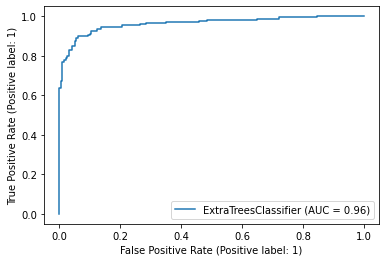

In [92]:
plot_roc_curve(model, x_test, y_test)
plt.show()

auc roc curve showing the performance for final model.

## Model saving

In [93]:
import joblib
joblib.dump(model,"Insurance_Fraud_Detection.pkl")

['Insurance_Fraud_Detection.pkl']